In [1]:
!pip install tweepy==3.10.0
!pip install tweet-preprocessor
!pip install textblob
!pip install sastrawi
!pip install emoji
!pip install PySastrawi

In [1]:
import os
import pandas as pd
import tweepy
import re
import string
from textblob import TextBlob
import preprocessor as p
from preprocessor.api import clean, tokenize, parse
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import datetime
from datetime import timedelta
import numpy as np
import emoji
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [2]:
#Read data
import pandas as pd
def load_data():
    data = pd.read_csv('clean_cashless.csv')
    return data

In [3]:
tweet_df = load_data()

In [4]:
tweet_df.to_csv('clean_cashless.csv', encoding='utf8', index = False)

In [5]:
df = pd.read_csv('clean_cashless.csv')
df.head(10)

,tweet
0,want remove ordinary cashless banking
1,rarely cashless ride motorcycle taxi
2,cashless payment evenly distributed gas station
3,seller cashless
4,cashless hold money
5,nice pay cashless
6,implement cashless
7,like cashless lifestyle premium card holder re...
8,peekaboo seller pay using scan cashless really...
9,informed taxpayer make cashless tax payment


In [6]:
# Lexicon Based
!pip install VaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [7]:
df = pd.read_csv('clean_cashless.csv')
df.head(10)

,tweet
0,want remove ordinary cashless banking
1,rarely cashless ride motorcycle taxi
2,cashless payment evenly distributed gas station
3,seller cashless
4,cashless hold money
5,nice pay cashless
6,implement cashless
7,like cashless lifestyle premium card holder re...
8,peekaboo seller pay using scan cashless really...
9,informed taxpayer make cashless tax payment


In [8]:
scores = [analyser.polarity_scores(x) for x in tweet_df['tweet']]
print(scores)
tweet_df['Compound_Score'] = [x['compound'] for x in scores]

[{'neg': 0.0, 'neu': 0.755, 'pos': 0.245, 'compound': 0.0772}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.269, 'neu': 0.192, 'pos': 0.538, 'compound': 0.34}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'compound': 0.3612}, {'neg': 0.123, 'neu': 0.527, 'pos': 0.35, 'compound': 0.5563}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.7, 'pos': 0.3, 'compound': 0.4588}, {'neg': 0.215, 'neu': 0.579, 'pos': 0.207, 'compound': 0.2263}, {'neg': 0.139, 'neu': 0.495, 'pos': 0.366, 'compound': 0.5106}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.649, 'pos': 0.351, 'compound': 0.4019}, {'neg': 0.0, 'neu': 0.217, 'pos': 0.783, 'compound': 0.5574}, {'neg': 0.0, 'neu': 0.925, 'pos': 0.075, 'compound': 0.

In [9]:
tweet_df.head()

,tweet,Compound_Score
0,want remove ordinary cashless banking,0.0772
1,rarely cashless ride motorcycle taxi,0.0000
2,cashless payment evenly distributed gas station,0.0000
3,seller cashless,0.0000
4,cashless hold money,0.0000


In [10]:
tweet_df.nsmallest(10, ['Compound_Score'])

,tweet,Compound_Score
111,avoid paying fake money cash bit troublesome c...,-0.8934
445,really hostile towards cashless really wrong d...,-0.7708
156,paperless cash really bothered team event cell...,-0.7645
164,start online shopping cod stand cashless pa...,-0.7351
79,cashless kill,-0.6908
474,tried time time pin wrong give blocked differe...,-0.6369
129,pretend cashless pay parking panic,-0.6249
162,cod system removed agree cashless everywhere s...,-0.6249
551,actually cashless payment make difficult clueless,-0.6124
569,cashless card emergency money confd complicat...,-0.6124


In [11]:
#Compound Score lexicon based
tweet_df.loc[tweet_df['Compound_Score'] < 0, 'Sentiments'] = 'negatif'
tweet_df.loc[tweet_df['Compound_Score'] == 0, 'Sentiments'] = 'netral'
tweet_df.loc[tweet_df['Compound_Score'] > 0, 'Sentiments'] = 'positif'
tweet_df.head()

,tweet,Compound_Score,Sentiments
0,want remove ordinary cashless banking,0.0772,positif
1,rarely cashless ride motorcycle taxi,0.0000,netral
2,cashless payment evenly distributed gas station,0.0000,netral
3,seller cashless,0.0000,netral
4,cashless hold money,0.0000,netral


In [12]:
tweet_df.to_excel('hasil__cashless.xlsx',encoding='utf8', index=False)

In [13]:
tweet_df.to_csv('hasil__cashless.csv',encoding='utf8', index=False)

In [14]:
import pandas as pd
def load_data():
    data = pd.read_csv('hasil__cashless.csv')
    return data

In [15]:
tweet_df = load_data()
tweet_df.head()

,tweet,Compound_Score,Sentiments
0,want remove ordinary cashless banking,0.0772,positif
1,rarely cashless ride motorcycle taxi,0.0000,netral
2,cashless payment evenly distributed gas station,0.0000,netral
3,seller cashless,0.0000,netral
4,cashless hold money,0.0000,netral


595


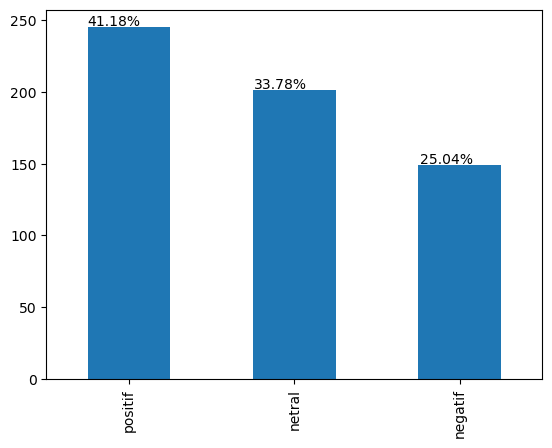

In [16]:
s = pd.value_counts(tweet_df['Sentiments'])
ax = s.plot.bar()
n = len(tweet_df.index)
print (n)
for p in ax.patches:
    ax.annotate(str(round(p.get_height() / n * 100, 2)) + '%', (p.get_x() * 1.005, p.get_height() * 1.005))

In [78]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [79]:
mask = np.array(Image.open('Downloads/twitter_mask.png'))

# Create stopword list
stopwords = set(STOPWORDS)
stopwords.update(["cashless"])

In [106]:
def generate_wordcloud(all_words):
    global WorldCloud
    wordcloud = WordCloud(width = 1600, mask=mask, stopwords=stopwords, height = 800, max_words = 1000,
                          background_color='#e0659d',
                          random_state=21, relative_scaling=0.5,
                          min_font_size =20).generate(str(all_words))
    
    plt.figure(figsize=(8, 8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

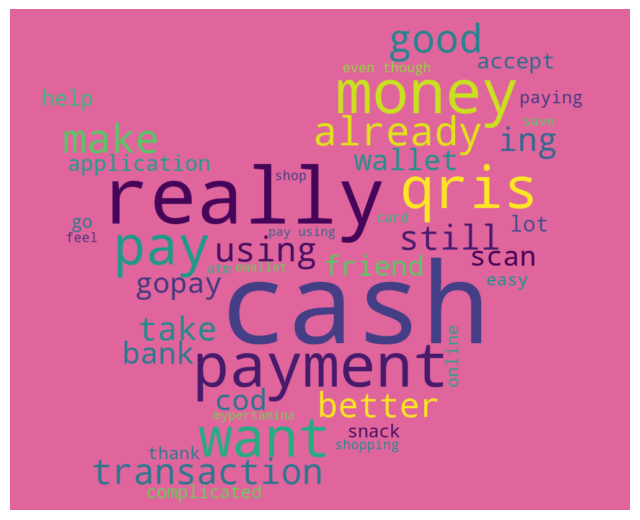

In [107]:
#wordcloud sentimen positif
all_words = ' '.join([text for text in tweet_df['tweet'][tweet_df.Sentiments == 'positif']])
generate_wordcloud(all_words)

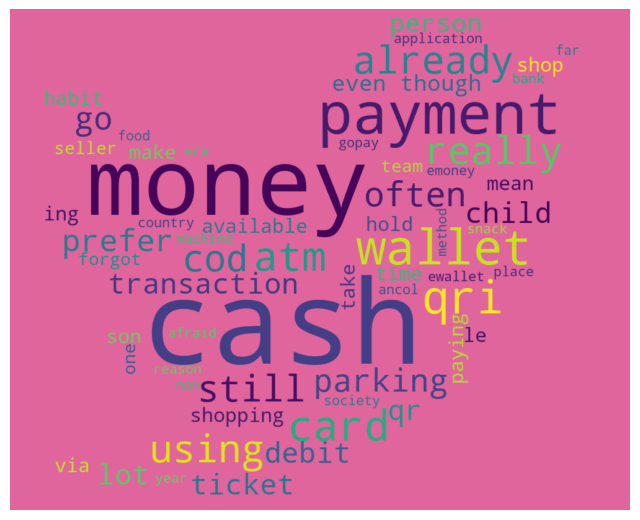

In [108]:
#wordcloud sentimen netral
all_words = ' '.join([text for text in tweet_df['tweet'][tweet_df.Sentiments == 'netral']])
generate_wordcloud(all_words)

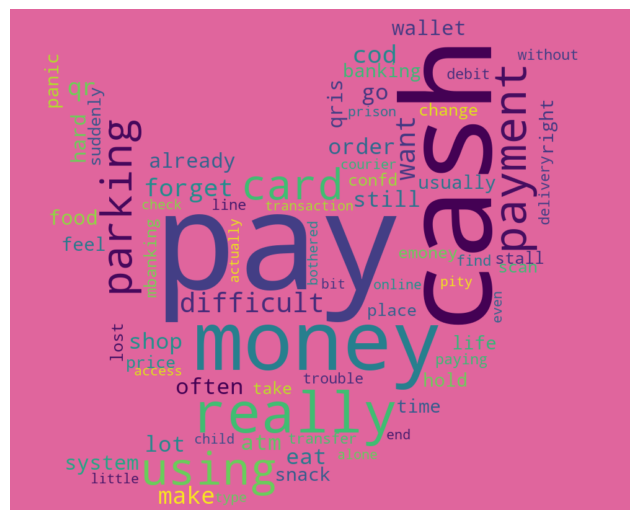

In [109]:
#wordcloud sentimen negatif
all_words = ' '.join([text for text in tweet_df['tweet'][tweet_df.Sentiments == 'negatif']])
generate_wordcloud(all_words)

In [22]:
!pip install VaderSentiment

In [23]:
import pandas as pd
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from openpyxl import Workbook

In [24]:
analyser = SentimentIntensityAnalyzer()

In [25]:
!pip install openpyxl==3.0.3

In [26]:
import openpyxl
from openpyxl import Workbook

In [27]:
#masukkan data label manual
dataset = pd.read_excel('klasifikasi.xlsx')

In [28]:
dataset.head()

,tweet,klasifikasi
0,want remove ordinary cashless banking,positif
1,rarely cashless ride motorcycle taxi,netral
2,cashless payment evenly distributed gas station,netral
3,seller cashless,positif
4,cashless hold money,positif


In [29]:
scores = [analyser.polarity_scores(x) for x in dataset['tweet']]
dataset['Compound_Score'] = [x['compound'] for x in scores]
dataset.head()

,tweet,klasifikasi,Compound_Score
0,want remove ordinary cashless banking,positif,0.0772
1,rarely cashless ride motorcycle taxi,netral,0.0000
2,cashless payment evenly distributed gas station,netral,0.0000
3,seller cashless,positif,0.0000
4,cashless hold money,positif,0.0000


In [30]:
dataset.loc[dataset['Compound_Score'] < 0, 'Sentiments'] = 'negatif'
dataset.loc[dataset['Compound_Score'] == 0, 'Sentiments'] = 'netral'
dataset.loc[dataset['Compound_Score'] > 0, 'Sentiments'] = 'positif'

In [31]:
dataset.head()

,tweet,klasifikasi,Compound_Score,Sentiments
0,want remove ordinary cashless banking,positif,0.0772,positif
1,rarely cashless ride motorcycle taxi,netral,0.0000,netral
2,cashless payment evenly distributed gas station,netral,0.0000,netral
3,seller cashless,positif,0.0000,netral
4,cashless hold money,positif,0.0000,netral


In [32]:
dataset.to_excel('hasil__perbandingan.xlsx',encoding='utf8', index=False)

In [33]:
from sklearn import metrics

In [34]:
print(metrics.classification_report(dataset['klasifikasi'], dataset['Sentiments']))

              precision    recall  f1-score   support

     negatif       0.48      0.87      0.62        83
      netral       0.31      0.81      0.45        77
     positif       0.96      0.54      0.69       435

    accuracy                           0.62       595
   macro avg       0.58      0.74      0.58       595
weighted avg       0.81      0.62      0.65       595

